<a href="https://colab.research.google.com/github/aauspicious/CodSoft-DataScience/blob/main/Titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
!pip install scikit-plot
import scikitplot as skplt

from google.colab import drive
drive.mount('/content/drive')


data_path = '/content/drive/MyDrive/Titanic-Dataset.csv'

# Load data using pandas
data = pd.read_csv(data_path)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data
#data = pd.read_csv('Titanic-Dataset.csv')

# Separating features and target variable
features = data.drop(columns=['PassengerId', 'Survived'])
target = data['Survived']

# Handling missing values (using SimpleImputer for Age)
imputer = SimpleImputer(strategy='median')
features['Age'] = imputer.fit_transform(features[['Age']])

# Encoding categorical features (OneHotEncoder for Pclass, Sex, and Embarked)
encoder = OneHotEncoder(sparse_output=False)
encoded_pclass = encoder.fit_transform(features[['Pclass']])
encoded_sex = encoder.fit_transform(features[['Sex']])
# Encoding 'Embarked' feature
encoded_embarked = encoder.fit_transform(features[['Embarked']]) # Encode the 'Embarked' feature

# Combining encoded features with remaining features
features = pd.concat([features[['SibSp', 'Parch', 'Fare']],
                            pd.DataFrame(encoded_pclass, columns=['Pclass_1', 'Pclass_2', 'Pclass_3']),
                            pd.DataFrame(encoded_sex, columns=['Sex_female', 'Sex_male']),
                            pd.DataFrame(encoded_embarked, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Unknown'])], axis=1) # Add encoded 'Embarked', include a column for unknown values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# predictions on testing set
y_pred = model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.776536312849162
Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



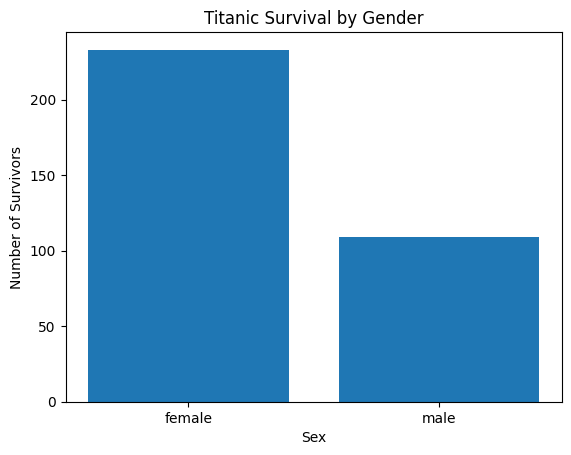

In [ ]:




import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Bar chart of survival count by gender
survived_by_sex = data.groupby('Sex')['Survived'].sum()
plt.bar(survived_by_sex.index, survived_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Titanic Survival by Gender')
plt.show()





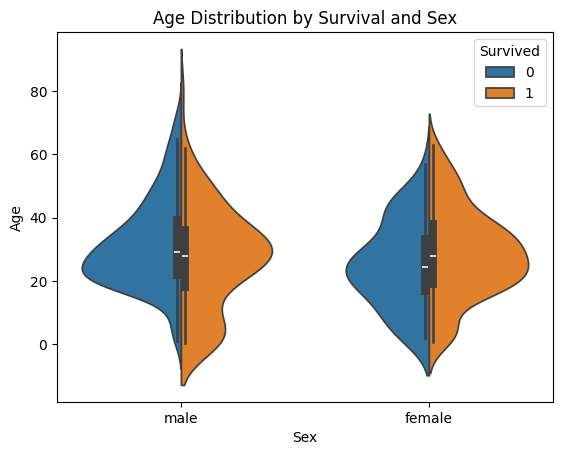

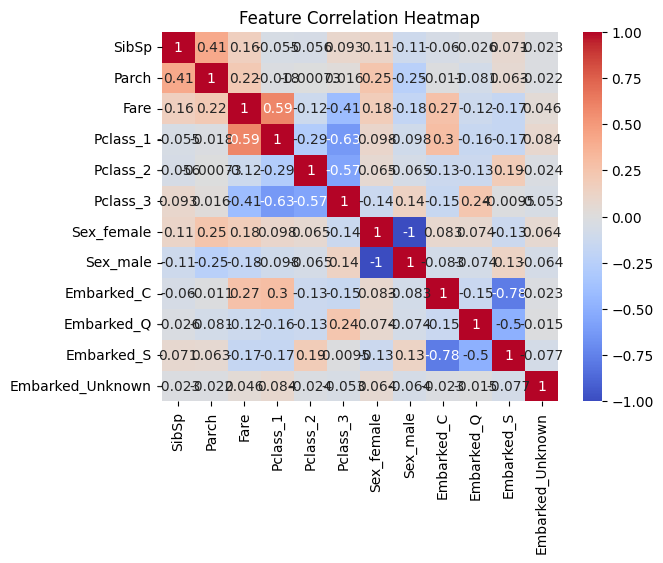

In [ ]:
import seaborn as sns


sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True)
plt.title('Age Distribution by Survival and Sex')
plt.show()

#Heatmap of feature correlations
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
import plotly.express as px

# Scatter plot of Fare vs. Age with color coding for survival
fig = px.scatter(data, x='Fare', y='Age', color='Survived',
                 hover_data=['PassengerId', 'Pclass', 'Sex', 'Embarked'])
fig.show()